In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

# EDA + Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [2]:
# https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('Data/titanic_train.csv')
titanic_test_df = pd.read_csv('Data/titanic_test.csv')
titanic_test_label_df = pd.read_csv('Data/titanic_gender_submission.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape of titanic_df: ", titanic_df.shape)
print("Shape of titanic_test_df: ", titanic_test_df.shape)
print("Shape of titanic_test_label_df: ", titanic_test_label_df.shape)

Shape of titanic_df:  (891, 12)
Shape of titanic_test_df:  (418, 11)
Shape of titanic_test_label_df:  (418, 2)


In [4]:
titanic_test_merged_df = pd.merge(titanic_test_df, titanic_test_label_df)
titanic_test_merged_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
print("Merged test shape: ", titanic_test_merged_df.shape)

Merged test shape:  (418, 12)


In [6]:
titanic_df = pd.concat([titanic_df, titanic_test_merged_df], sort=True)

In [7]:
titanic_df.shape

(1309, 12)

## Data Preprocessing

In [8]:
# PassengerId and Name are unnecessary
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Cabin", axis=1, inplace=True)

In [9]:
titanic_df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,0,3,male,1,0,A/5 21171
1,38.0,C,71.2833,0,1,female,1,1,PC 17599
2,26.0,S,7.9250,0,3,female,0,1,STON/O2. 3101282
3,35.0,S,53.1000,0,1,female,1,1,113803
4,35.0,S,8.0500,0,3,male,0,0,373450


In [10]:
titanic_df.isnull().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
Ticket        0
dtype: int64

In [11]:
# Lets look at the rows with null
titanic_df[titanic_df['Age'].isnull()].head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,Q,8.4583,0,3,male,0,0,330877
17,NaN,S,13.0000,0,2,male,0,1,244373
19,NaN,C,7.2250,0,3,female,0,1,2649
26,NaN,C,7.2250,0,3,male,0,0,2631
28,NaN,Q,7.8792,0,3,female,0,1,330959


In [12]:
le = LabelEncoder()

def convStr(arg):
    return str(arg)

def convSurvived(arg):
    if arg == 0:
        return -1
    else:
        return 1
    
titanic_df[titanic_df['Age'].isnull()] = -1
titanic_df[titanic_df['Fare'].isnull()] = -1
titanic_df['Embarked'] = titanic_df['Embarked'].apply(convStr)
titanic_df['Sex'] = titanic_df['Sex'].apply(convStr)
titanic_df['Ticket'] = titanic_df['Ticket'].apply(convStr)
titanic_df['Survived'] = titanic_df['Survived'].apply(convSurvived)

def data_transform(df):
    df['Sex']= le.fit_transform(df['Sex'])
    df['Ticket']= le.fit_transform(df['Ticket'])
    df['Embarked']= le.fit_transform(df['Embarked'])
    return df

In [13]:
titanic_df_mod = data_transform(titanic_df)

In [14]:
titanic_df_mod.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Ticket      0
dtype: int64

In [15]:
titanic_df_mod.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,3,7.2500,0,3,2,1,-1,555
1,38.0,1,71.2833,0,1,1,1,1,639
2,26.0,3,7.9250,0,3,1,0,1,719
3,35.0,3,53.1000,0,1,1,1,1,55
4,35.0,3,8.0500,0,3,2,0,-1,508


In [16]:
# Normalize the values for age, fare and ticket since they are so big
scaler_vals = StandardScaler().fit(titanic_df_mod[['Age', 'Fare', 'Ticket']])

titanic_df_mod[['Age', 'Fare', 'Ticket']] = scaler_vals.transform(titanic_df_mod[['Age', 'Fare', 'Ticket']])

In [17]:
print(titanic_df_mod.head())
print("----")
print('Columns: \n', titanic_df_mod.columns.values)

        Age  Embarked      Fare  Parch  Pclass  Sex  SibSp  Survived    Ticket
0 -0.091329         3 -0.419761      0       3    2      1        -1  1.081819
1  0.805365         1  0.811201      0       1    1      1         1  1.426929
2  0.132844         3 -0.406785      0       3    1      0         1  1.755605
3  0.637235         3  0.461649      0       1    1      1         1 -0.972407
4  0.637235         3 -0.404382      0       3    2      0        -1  0.888722
----
Columns: 
 ['Age' 'Embarked' 'Fare' 'Parch' 'Pclass' 'Sex' 'SibSp' 'Survived'
 'Ticket']


### Split into training partitions + shuffling 3 sets (3 partition: 20/80, 50/50, 80/20; 3 shuffles)

In [18]:
train_partition_80_20 = []
test_partition_80_20 = []
train_partition_20_80 = []
test_partition_20_80 = []
train_partition_50_50 = []
test_partition_50_50 = []

titanic_y = titanic_df_mod['Survived'].values
titanic_y = titanic_y.reshape(len(titanic_y), 1)
titanic_X_df = titanic_df_mod.drop("Survived", axis=1)
titanic_X = titanic_X_df.values
X_and_Y = np.hstack((titanic_X, titanic_y))

for val in range(3):
    # Different trials (Shuffles)
    cur_X_and_Y = shuffle(X_and_Y)
    
    X_train_80_20, X_test_80_20, y_train_80_20, y_test_80_20 = train_test_split(cur_X_and_Y[:, :-1], cur_X_and_Y[:, -1], test_size=0.2)

    X_train_50_50, X_test_50_50, y_train_50_50, y_test_50_50 = train_test_split(cur_X_and_Y[:, :-1], cur_X_and_Y[:, -1], test_size=0.5)

    X_train_20_80, X_test_20_80, y_train_20_80, y_test_20_80 = train_test_split(cur_X_and_Y[:, :-1], cur_X_and_Y[:, -1], test_size=0.8)
    
    train_partition_80_20.append([X_train_80_20, y_train_80_20])
    test_partition_80_20.append([X_test_80_20, y_test_80_20])
    train_partition_20_80.append([X_train_20_80,y_train_20_80])
    test_partition_20_80.append([X_test_20_80,y_test_20_80])
    train_partition_50_50.append([X_train_50_50,y_train_50_50])
    test_partition_50_50.append([X_test_50_50,y_test_50_50])

In [19]:
train_partition_80_20[0][0]

array([[-3.52859351e-02,  3.00000000e+00, -3.38060347e-01, ...,
         2.00000000e+00,  2.00000000e+00, -1.09631942e-01],
       [ 1.32844265e-01,  3.00000000e+00, -1.64413867e-03, ...,
         2.00000000e+00,  1.00000000e+00, -4.46524970e-01],
       [-1.38032754e+00,  0.00000000e+00, -5.78357639e-01, ...,
         0.00000000e+00, -1.00000000e+00, -1.19837160e+00],
       ...,
       [-3.15502936e-01,  3.00000000e+00, -3.38060347e-01, ...,
         2.00000000e+00,  0.00000000e+00, -6.68381353e-01],
       [ 9.17451866e-01,  3.00000000e+00, -5.59133855e-01, ...,
         2.00000000e+00,  0.00000000e+00, -1.12852793e+00],
       [-1.38032754e+00,  0.00000000e+00, -5.78357639e-01, ...,
         0.00000000e+00, -1.00000000e+00, -1.19837160e+00]])

In [20]:
# Confirm the partitions are correct
print("Shape of training samples 80_20: ", len(train_partition_80_20))
print("Size of training samples 80_20: ", len(train_partition_80_20[0][0]))
print("Size of training labels 80_20: ", len(train_partition_80_20[0][1]))
print("------------------------------------")
print("Shape of training samples 20_80: ", len(train_partition_20_80))
print("Size of training samples 20_80: ", len(train_partition_20_80[0][0]))
print("Size of training labels 20_80: ", len(train_partition_20_80[0][1]))
print("------------------------------------")
print("Shape of training samples 50_50: ", len(train_partition_50_50))
print("Size of training samples 50_50: ", len(train_partition_50_50[0][0]))
print("Size of training labels 50_50: ", len(train_partition_50_50[0][1]))
print("------------------------------------")

Shape of training samples 80_20:  3
Size of training samples 80_20:  1047
Size of training labels 80_20:  1047
------------------------------------
Shape of training samples 20_80:  3
Size of training samples 20_80:  261
Size of training labels 20_80:  261
------------------------------------
Shape of training samples 50_50:  3
Size of training samples 50_50:  654
Size of training labels 50_50:  654
------------------------------------


In [21]:
# Helper method to calculate accuracy
def calc_acc(X, Y, classifier):
    Y_pred = classifier.predict(X)
    return accuracy_score(Y, Y_pred)

## SVC

In [23]:
# Training errors
svc_training_errors_20_80 = []
svc_training_errors_80_20 = []
svc_training_errors_50_50 = []

svc_cv_errors_20_80 = []
svc_cv_errors_80_20 = []
svc_cv_errors_50_50 = []

svc_testing_errors_20_80 = []
svc_testing_errors_80_20 = []
svc_testing_errors_50_50 = []

svc_train_partitions = [train_partition_20_80, train_partition_80_20, train_partition_50_50]
svc_test_partitions = [test_partition_20_80, test_partition_80_20, test_partition_50_50]

for val, partition in enumerate(svc_train_partitions):
    for ind in range(3):
        
        classifier = svm.SVC(kernel='linear')
        c_list = [1, 10, 100, 1000, 10000]
        svm_param_list = {'C': c_list}
        svc_grid_search = GridSearchCV(classifier, svm_param_list, cv=5, return_train_score=True)
        svc_grid_search.fit(partition[ind][0], partition[ind][1])
        
        train_errors = svc_grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = svc_grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        test_errors = calc_acc(svc_test_partitions[val][ind][0],
                               svc_test_partitions[val][ind][1], svc_grid_search)
        if val == 0:
            svc_training_errors_20_80.append(train_errors)
            svc_cv_errors_20_80.append(cross_val_errors)
            svc_testing_errors_20_80.append(test_errors)
        elif val == 1:
            svc_training_errors_80_20.append(train_errors)
            svc_cv_errors_80_20.append(cross_val_errors)
            svc_testing_errors_80_20.append(test_errors)
        elif val == 2:
            svc_training_errors_50_50.append(train_errors)
            svc_cv_errors_50_50.append(cross_val_errors)
            svc_testing_errors_50_50.append(test_errors)

In [24]:
# Show the accuracy of the 20-80 partition
print(svc_training_errors_20_80[0])
print(svc_training_errors_20_80[1])
print(svc_training_errors_20_80[2])

svc_avg_train_20_80 = np.mean(svc_training_errors_20_80, axis=0)
svc_avg_train_80_20 = np.mean(svc_training_errors_80_20, axis=0)
svc_avg_train_50_50 = np.mean(svc_training_errors_50_50, axis=0)

svc_avg_cv_20_80 = np.mean(svc_cv_errors_20_80, axis=0)
svc_avg_cv_80_20 = np.mean(svc_cv_errors_80_20, axis=0)
svc_avg_cv_50_50 = np.mean(svc_cv_errors_50_50, axis=0)

svc_avg_test_20_80 = np.mean(svc_testing_errors_20_80, axis=0)
svc_avg_test_80_20 = np.mean(svc_testing_errors_80_20, axis=0)
svc_avg_test_50_50 = np.mean(svc_testing_errors_50_50, axis=0)

[[0.87738774]
 [0.87738774]
 [0.87738774]
 [0.87738774]
 [0.87738774]]
[[0.87739234]
 [0.87739234]
 [0.87739234]
 [0.87739234]
 [0.87739234]]
[[0.86206754]
 [0.86206754]
 [0.86206754]
 [0.86206754]
 [0.86206754]]


In [25]:
def heatmap_SVM(acc_arr, title, c_list, split):
    if not c_list:
        plt.figure(figsize = (9,2))
        ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                         xticklabels=split, yticklabels='', cmap = "Blues")
        ax.collections[0].colorbar.set_label("accuracy")
        ax.set(xlabel = 'test/train splits', ylabel='accuracy')
        plt.title(title)
        sns.set_style("whitegrid", {'axes.grid' : False})
        plt.show()
        return
    plt.figure(figsize = (8,4))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=c_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'SVM Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()


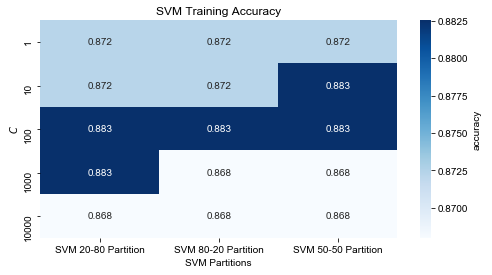

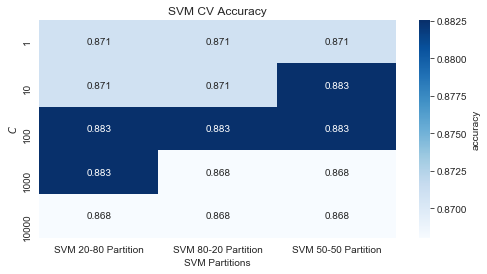

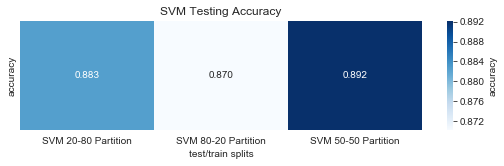

In [26]:
c_list = [1, 10, 100, 1000, 10000]
partition_names = ["SVM 20-80 Partition", "SVM 80-20 Partition", "SVM 50-50 Partition"]

svc_overall_train_acc = np.array([svc_avg_train_20_80, svc_avg_train_80_20, svc_avg_train_50_50])
svc_overall_train_acc = svc_overall_train_acc.reshape(5, 3)

svc_overall_cv_acc = np.array([svc_avg_cv_20_80, svc_avg_cv_80_20, svc_avg_cv_50_50])
svc_overall_cv_acc = svc_overall_cv_acc.reshape(5, 3)

svc_overall_test_acc = np.array([svc_avg_test_20_80, svc_avg_test_80_20, svc_avg_test_50_50]).reshape(1,3)

heatmap_SVM(svc_overall_train_acc, "SVM Training Accuracy", c_list, partition_names)
heatmap_SVM(svc_overall_cv_acc, "SVM CV Accuracy", c_list, partition_names)
heatmap_SVM(svc_overall_test_acc, "SVM Testing Accuracy", None, partition_names)

## KNN

In [27]:
# Training errors
knn_training_errors_20_80 = []
knn_training_errors_80_20 = []
knn_training_errors_50_50 = []

knn_cv_errors_20_80 = []
knn_cv_errors_80_20 = []
knn_cv_errors_50_50 = []

knn_testing_errors_20_80 = []
knn_testing_errors_80_20 = []
knn_testing_errors_50_50 = []

knn_train_partitions = [train_partition_20_80, train_partition_80_20, train_partition_50_50]
knn_test_partitions = [test_partition_20_80, test_partition_80_20, test_partition_50_50]

for val, partition in enumerate(knn_train_partitions):
    for ind in range(3):
        # KNN Model
        neighbors_estimator = neighbors.KNeighborsClassifier()

        k_list = [1, 2, 3, 4, 5]
        param_grid = {'n_neighbors': k_list}
        neighbors_grid_search = GridSearchCV(neighbors_estimator, param_grid, cv=5, return_train_score=True)

        # 3. Use the grid searcher to fit the training set.
        neighbors_grid_search.fit(partition[ind][0], partition[ind][1])
        
        train_errors = neighbors_grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = neighbors_grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        test_errors = calc_acc(knn_test_partitions[val][ind][0],
                               knn_test_partitions[val][ind][1], neighbors_grid_search)
        if val == 0:
            knn_training_errors_20_80.append(train_errors)
            knn_cv_errors_20_80.append(cross_val_errors)
            knn_testing_errors_20_80.append(test_errors)
        elif val == 1:
            knn_training_errors_80_20.append(train_errors)
            knn_cv_errors_80_20.append(cross_val_errors)
            knn_testing_errors_80_20.append(test_errors)
        elif val == 2:
            knn_training_errors_50_50.append(train_errors)
            knn_cv_errors_50_50.append(cross_val_errors)
            knn_testing_errors_50_50.append(test_errors)

In [28]:
# Show the accuracy of the 20-80 partition
print(knn_training_errors_20_80[0])
print(knn_training_errors_20_80[1])
print(knn_training_errors_20_80[2])

knn_avg_train_20_80 = np.mean(knn_training_errors_20_80, axis=0)
knn_avg_train_80_20 = np.mean(knn_training_errors_80_20, axis=0)
knn_avg_train_50_50 = np.mean(knn_training_errors_50_50, axis=0)

knn_avg_cv_20_80 = np.mean(knn_cv_errors_20_80, axis=0)
knn_avg_cv_80_20 = np.mean(knn_cv_errors_80_20, axis=0)
knn_avg_cv_50_50 = np.mean(knn_cv_errors_50_50, axis=0)

knn_avg_test_20_80 = np.mean(knn_testing_errors_20_80, axis=0)
knn_avg_test_80_20 = np.mean(knn_testing_errors_80_20, axis=0)
knn_avg_test_50_50 = np.mean(knn_testing_errors_50_50, axis=0)

[[1.        ]
 [0.88024015]
 [0.91091277]
 [0.86491535]
 [0.86301067]]
[[1.        ]
 [0.8889032 ]
 [0.88793706]
 [0.86209054]
 [0.86780916]]
[[1.        ]
 [0.87453073]
 [0.86974144]
 [0.84389032]
 [0.84195804]]


In [29]:
def heatmap_KNN(acc_arr, title, k_list, split):
    if not k_list:
        plt.figure(figsize = (9,4))
        ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                         xticklabels=split, yticklabels='', cmap = "Blues")
        ax.collections[0].colorbar.set_label("accuracy")
        ax.set(xlabel = 'test/train splits', ylabel='accuracy')
        plt.title(title)
        sns.set_style("whitegrid", {'axes.grid' : False})
        plt.show()
        return
    plt.figure(figsize = (8,4))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=c_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'KNN Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

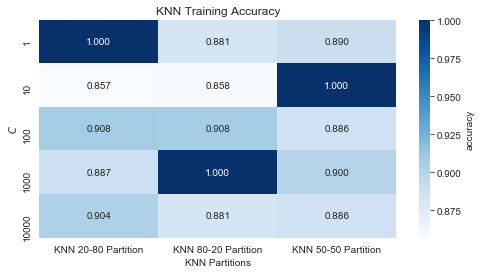

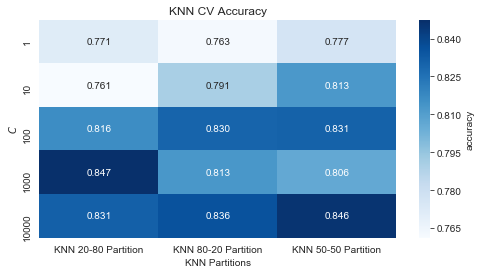

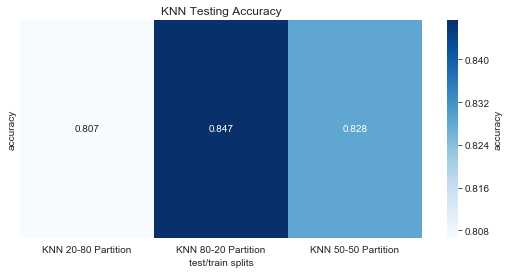

In [30]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
partition_names = ["KNN 20-80 Partition", "KNN 80-20 Partition", "KNN 50-50 Partition"]

knn_overall_train_acc = np.array([knn_avg_train_20_80, knn_avg_train_80_20, knn_avg_train_50_50])
knn_overall_train_acc = knn_overall_train_acc.reshape(5, 3)

knn_overall_cv_acc = np.array([knn_avg_cv_20_80, knn_avg_cv_80_20, knn_avg_cv_50_50])
knn_overall_cv_acc = knn_overall_cv_acc.reshape(5, 3)

knn_overall_test_acc = np.array([knn_avg_test_20_80,
                                 knn_avg_test_80_20, knn_avg_test_50_50]).reshape(1,3)

heatmap_KNN(knn_overall_train_acc, "KNN Training Accuracy", k_list, partition_names)
heatmap_KNN(knn_overall_cv_acc, "KNN CV Accuracy", k_list, partition_names)
heatmap_KNN(knn_overall_test_acc, "KNN Testing Accuracy", None, partition_names)

## Logistic Regression

In [31]:
# Training errors
lr_training_errors_20_80 = []
lr_training_errors_80_20 = []
lr_training_errors_50_50 = []

lr_cv_errors_20_80 = []
lr_cv_errors_80_20 = []
lr_cv_errors_50_50 = []

lr_testing_errors_20_80 = []
lr_testing_errors_80_20 = []
lr_testing_errors_50_50 = []

lr_train_partitions = [train_partition_20_80, train_partition_80_20, train_partition_50_50]
lr_test_partitions = [test_partition_20_80, test_partition_80_20, test_partition_50_50]

for val, partition in enumerate(lr_train_partitions):
    for ind in range(3):

        log_reg_estimator  = LogisticRegression(solver='liblinear', multi_class='ovr')
        c_list = [0.001, 0.01, 0.1, 1, 10]

        log_param_list = {'C': c_list}

        log_grid_search = GridSearchCV(log_reg_estimator, log_param_list, cv=5, return_train_score=True)
        log_grid_search.fit(partition[ind][0], partition[ind][1])
        
        train_errors = log_grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = log_grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        test_errors = calc_acc(lr_test_partitions[val][ind][0],
                               lr_test_partitions[val][ind][1], log_grid_search)
        if val == 0:
            lr_training_errors_20_80.append(train_errors)
            lr_cv_errors_20_80.append(cross_val_errors)
            lr_testing_errors_20_80.append(test_errors)
        elif val == 1:
            lr_training_errors_80_20.append(train_errors)
            lr_cv_errors_80_20.append(cross_val_errors)
            lr_testing_errors_80_20.append(test_errors)
        elif val == 2:
            lr_training_errors_50_50.append(train_errors)
            lr_cv_errors_50_50.append(cross_val_errors)
            lr_testing_errors_50_50.append(test_errors)

In [32]:
# Show the accuracy of the 20-80 partition
print(lr_training_errors_20_80[0])
print(lr_training_errors_20_80[1])
print(lr_training_errors_20_80[2])

lr_avg_train_20_80 = np.mean(lr_training_errors_20_80, axis=0)
lr_avg_train_80_20 = np.mean(lr_training_errors_80_20, axis=0)
lr_avg_train_50_50 = np.mean(lr_training_errors_50_50, axis=0)

lr_avg_cv_20_80 = np.mean(lr_cv_errors_20_80, axis=0)
lr_avg_cv_80_20 = np.mean(lr_cv_errors_80_20, axis=0)
lr_avg_cv_50_50 = np.mean(lr_cv_errors_50_50, axis=0)

lr_avg_test_20_80 = np.mean(lr_testing_errors_20_80, axis=0)
lr_avg_test_80_20 = np.mean(lr_testing_errors_80_20, axis=0)
lr_avg_test_50_50 = np.mean(lr_testing_errors_50_50, axis=0)

[[0.67815145]
 [0.71742271]
 [0.80459606]
 [0.88026316]
 [0.8888848 ]]
[[0.67911759]
 [0.73276592]
 [0.80939915]
 [0.88217703]
 [0.88026316]]
[[0.70113636]
 [0.74425837]
 [0.8055576 ]
 [0.87356459]
 [0.87164152]]


In [33]:
def heatmap_Log(acc_arr, title, c_list, split):
    if not c_list:
        plt.figure(figsize = (9,2))
        ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                         xticklabels=split, yticklabels='', cmap = "Blues")
        ax.collections[0].colorbar.set_label("accuracy")
        ax.set(xlabel = 'test/train splits', ylabel='accuracy')
        plt.title(title)
        sns.set_style("whitegrid", {'axes.grid' : False})
        plt.show()
        return
    plt.figure(figsize = (8,4))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=c_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'Log Reg. Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

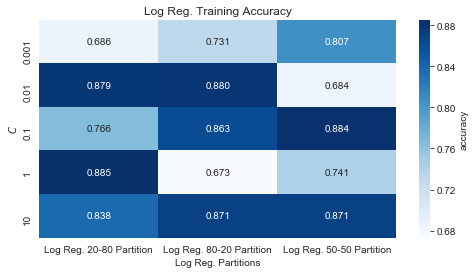

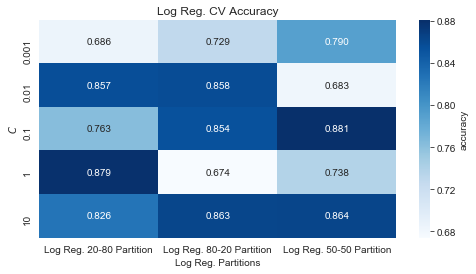

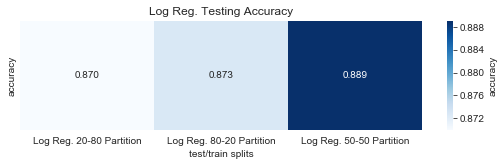

In [34]:
c_list = [0.001, 0.01, 0.1, 1, 10]
partition_names = ["Log Reg. 20-80 Partition", "Log Reg. 80-20 Partition", "Log Reg. 50-50 Partition"]

lr_overall_train_acc = np.array([lr_avg_train_20_80, lr_avg_train_80_20, lr_avg_train_50_50])
lr_overall_train_acc = lr_overall_train_acc.reshape(5, 3)

lr_overall_cv_acc = np.array([lr_avg_cv_20_80, lr_avg_cv_80_20, lr_avg_cv_50_50])
lr_overall_cv_acc = lr_overall_cv_acc.reshape(5, 3)

lr_overall_test_acc = np.array([lr_avg_test_20_80, lr_avg_test_80_20, lr_avg_test_50_50]).reshape(1,3)

heatmap_Log(lr_overall_train_acc, "Log Reg. Training Accuracy", c_list, partition_names)
heatmap_Log(lr_overall_cv_acc, "Log Reg. CV Accuracy", c_list, partition_names)
heatmap_Log(lr_overall_test_acc, "Log Reg. Testing Accuracy", None, partition_names)

## Decision Tree

In [35]:
# Training errors
dt_training_errors_20_80 = []
dt_training_errors_80_20 = []
dt_training_errors_50_50 = []

dt_cv_errors_20_80 = []
dt_cv_errors_80_20 = []
dt_cv_errors_50_50 = []

dt_testing_errors_20_80 = []
dt_testing_errors_80_20 = []
dt_testing_errors_50_50 = []

dt_train_partitions = [train_partition_20_80, train_partition_80_20, train_partition_50_50]
dt_test_partitions = [test_partition_20_80, test_partition_80_20, test_partition_50_50]

for val, partition in enumerate(dt_train_partitions):
    for ind in range(3):
        
        dt_estimator = DecisionTreeClassifier(criterion = 'entropy')
        D_list = [1, 2, 3, 4, 5]

        dt_param_list = {'max_depth': D_list}
        tree_grid_search = GridSearchCV(dt_estimator, dt_param_list, cv = 5, return_train_score=True)
        tree_grid_search.fit(partition[ind][0], partition[ind][1])
        
        train_errors = tree_grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = tree_grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        test_errors = calc_acc(dt_test_partitions[val][ind][0],
                               dt_test_partitions[val][ind][1], tree_grid_search)
        if val == 0:
            dt_training_errors_20_80.append(train_errors)
            dt_cv_errors_20_80.append(cross_val_errors)
            dt_testing_errors_20_80.append(test_errors)
        elif val == 1:
            dt_training_errors_80_20.append(train_errors)
            dt_cv_errors_80_20.append(cross_val_errors)
            dt_testing_errors_80_20.append(test_errors)
        elif val == 2:
            dt_training_errors_50_50.append(train_errors)
            dt_cv_errors_50_50.append(cross_val_errors)
            dt_testing_errors_50_50.append(test_errors)

In [36]:
# Show the accuracy of the 20-80 partition
print(dt_training_errors_20_80[0])
print(dt_training_errors_20_80[1])
print(dt_training_errors_20_80[2])

dt_avg_train_20_80 = np.mean(dt_training_errors_20_80, axis=0)
dt_avg_train_80_20 = np.mean(dt_training_errors_80_20, axis=0)
dt_avg_train_50_50 = np.mean(dt_training_errors_50_50, axis=0)

dt_avg_cv_20_80 = np.mean(dt_cv_errors_20_80, axis=0)
dt_avg_cv_80_20 = np.mean(dt_cv_errors_80_20, axis=0)
dt_avg_cv_50_50 = np.mean(dt_cv_errors_50_50, axis=0)

dt_avg_test_20_80 = np.mean(dt_testing_errors_20_80, axis=0)
dt_avg_test_80_20 = np.mean(dt_testing_errors_80_20, axis=0)
dt_avg_test_50_50 = np.mean(dt_testing_errors_50_50, axis=0)

[[0.87738774]
 [0.87738774]
 [0.90612808]
 [0.92528524]
 [0.94828855]]
[[0.87355999]
 [0.87355999]
 [0.90324807]
 [0.92337597]
 [0.94826555]]
[[0.86206754]
 [0.86782297]
 [0.89080788]
 [0.91380199]
 [0.93774844]]


In [37]:
def heatmap_DT(acc_arr, title, d_list, split):
    if not d_list:
        plt.figure(figsize = (9,2))
        ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                         xticklabels=split, yticklabels='', cmap = "Blues")
        ax.collections[0].colorbar.set_label("accuracy")
        ax.set(xlabel = 'test/train splits', ylabel='accuracy')
        plt.title(title)
        sns.set_style("whitegrid", {'axes.grid' : False})
        plt.show()
        return
    plt.figure(figsize = (8,4))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=d_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'DT Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

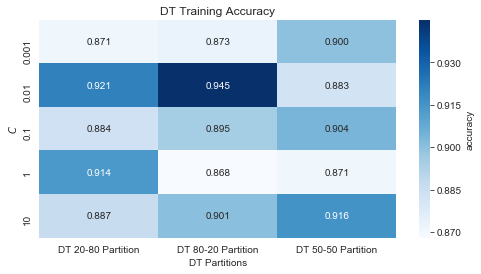

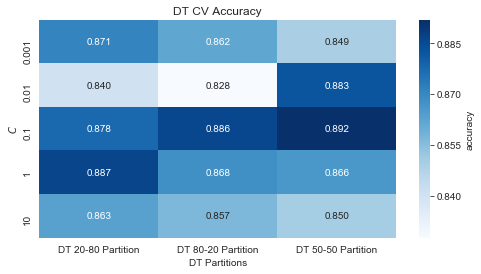

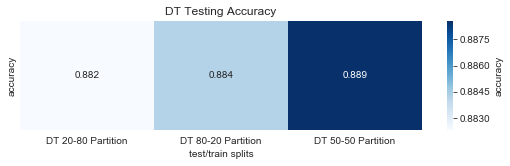

In [38]:
D_list = [1, 2, 3, 4, 5]
partition_names = ["DT 20-80 Partition", "DT 80-20 Partition", "DT 50-50 Partition"]

dt_overall_train_acc = np.array([dt_avg_train_20_80, dt_avg_train_80_20, dt_avg_train_50_50])
dt_overall_train_acc = dt_overall_train_acc.reshape(5, 3)

dt_overall_cv_acc = np.array([dt_avg_cv_20_80, dt_avg_cv_80_20, dt_avg_cv_50_50])
dt_overall_cv_acc = dt_overall_cv_acc.reshape(5, 3)

dt_overall_test_acc = np.array([dt_avg_test_20_80, dt_avg_test_80_20, dt_avg_test_50_50]).reshape(1,3)

heatmap_DT(dt_overall_train_acc, "DT Training Accuracy", c_list, partition_names)
heatmap_DT(dt_overall_cv_acc, "DT CV Accuracy", c_list, partition_names)
heatmap_DT(dt_overall_test_acc, "DT Testing Accuracy", None, partition_names)

## Random Forest

In [39]:
# Training errors
rf_training_errors_20_80 = []
rf_training_errors_80_20 = []
rf_training_errors_50_50 = []

rf_cv_errors_20_80 = []
rf_cv_errors_80_20 = []
rf_cv_errors_50_50 = []

rf_testing_errors_20_80 = []
rf_testing_errors_80_20 = []
rf_testing_errors_50_50 = []

rf_train_partitions = [train_partition_20_80, train_partition_80_20, train_partition_50_50]
rf_test_partitions = [test_partition_20_80, test_partition_80_20, test_partition_50_50]

for val, partition in enumerate(rf_train_partitions):
    for ind in range(3):
        
        rf_estimator = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')
        D_list = [1, 2, 3, 4, 5]

        rf_param_list = {'max_depth': D_list}
        rf_grid_search = GridSearchCV(rf_estimator, rf_param_list, cv = 5, return_train_score=True)
        rf_grid_search.fit(partition[ind][0], partition[ind][1])
        
        train_errors = rf_grid_search.cv_results_['mean_train_score'].reshape(-1,1)
        cross_val_errors = rf_grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        test_errors = calc_acc(rf_test_partitions[val][ind][0],
                               rf_test_partitions[val][ind][1], rf_grid_search)
        if val == 0:
            rf_training_errors_20_80.append(train_errors)
            rf_cv_errors_20_80.append(cross_val_errors)
            rf_testing_errors_20_80.append(test_errors)
        elif val == 1:
            rf_training_errors_80_20.append(train_errors)
            rf_cv_errors_80_20.append(cross_val_errors)
            rf_testing_errors_80_20.append(test_errors)
        elif val == 2:
            rf_training_errors_50_50.append(train_errors)
            rf_cv_errors_50_50.append(cross_val_errors)
            rf_testing_errors_50_50.append(test_errors)

In [40]:
# Show the accuracy of the 20-80 partition
print(rf_training_errors_20_80[0])
print(rf_training_errors_20_80[1])
print(rf_training_errors_20_80[2])

rf_avg_train_20_80 = np.mean(rf_training_errors_20_80, axis=0)
rf_avg_train_80_20 = np.mean(rf_training_errors_80_20, axis=0)
rf_avg_train_50_50 = np.mean(rf_training_errors_50_50, axis=0)

rf_avg_cv_20_80 = np.mean(rf_cv_errors_20_80, axis=0)
rf_avg_cv_80_20 = np.mean(rf_cv_errors_80_20, axis=0)
rf_avg_cv_50_50 = np.mean(rf_cv_errors_50_50, axis=0)

rf_avg_test_20_80 = np.mean(rf_testing_errors_20_80, axis=0)
rf_avg_test_80_20 = np.mean(rf_testing_errors_80_20, axis=0)
rf_avg_test_50_50 = np.mean(rf_testing_errors_50_50, axis=0)

[[0.87738774]
 [0.8812155 ]
 [0.89941572]
 [0.91281745]
 [0.92622838]]
[[0.83139032]
 [0.87930162]
 [0.90326647]
 [0.92624218]
 [0.94157619]]
[[0.82857932]
 [0.86492915]
 [0.88312937]
 [0.8965587 ]
 [0.92146669]]


In [41]:
def heatmap_RF(acc_arr, title, rf_list, split):
    if not rf_list:
        plt.figure(figsize = (9,2))
        ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                         xticklabels=split, yticklabels='', cmap = "Blues")
        ax.collections[0].colorbar.set_label("accuracy")
        ax.set(xlabel = 'test/train splits', ylabel='accuracy')
        plt.title(title)
        sns.set_style("whitegrid", {'axes.grid' : False})
        plt.show()
        return
    plt.figure(figsize = (8,4))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=rf_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'RF Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()


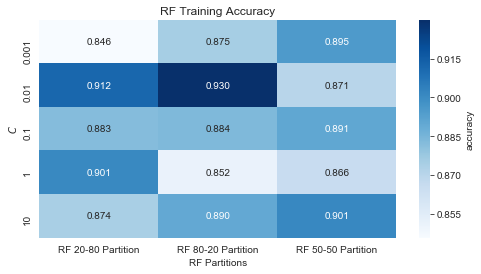

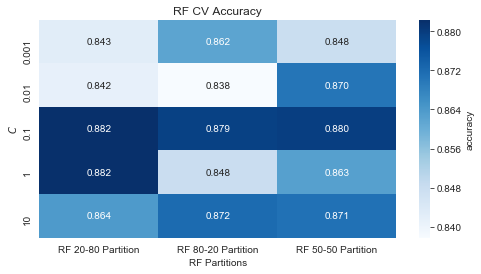

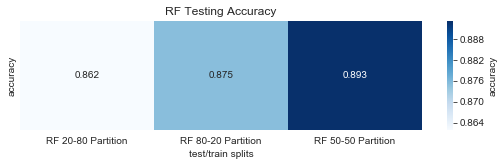

In [42]:
D_list = [1, 2, 3, 4, 5]
partition_names = ["RF 20-80 Partition", "RF 80-20 Partition", "RF 50-50 Partition"]

rf_overall_train_acc = np.array([rf_avg_train_20_80, rf_avg_train_80_20, rf_avg_train_50_50])
rf_overall_train_acc = rf_overall_train_acc.reshape(5, 3)

rf_overall_cv_acc = np.array([rf_avg_cv_20_80, rf_avg_cv_80_20, rf_avg_cv_50_50])
rf_overall_cv_acc = rf_overall_cv_acc.reshape(5, 3)

rf_overall_test_acc = np.array([rf_avg_test_20_80, rf_avg_test_80_20, rf_avg_test_50_50]).reshape(1,3)

heatmap_RF(rf_overall_train_acc, "RF Training Accuracy", c_list, partition_names)
heatmap_RF(rf_overall_cv_acc, "RF CV Accuracy", c_list, partition_names)
heatmap_RF(rf_overall_test_acc, "RF Testing Accuracy", None, partition_names)

# Look at the test results for all 5 Classifiers

In [43]:
print("Support Vector Machine Test Accuracy: ", svc_overall_test_acc)
print("K-Nearest Neighbors Test Accuracy: ", knn_overall_test_acc)
print("Logistic Regression Test Accuracy: ", lr_overall_test_acc)
print("Decision Tree Test Accuracy: ", dt_overall_test_acc)
print("Random forest Test Accuracy: ", rf_overall_test_acc)

Support Vector Machine Test Accuracy:  [[0.88263359 0.87022901 0.89211196]]
K-Nearest Neighbors Test Accuracy:  [[0.80661578 0.84732824 0.82849873]]
Logistic Regression Test Accuracy:  [[0.86991094 0.87277354 0.88905852]]
Decision Tree Test Accuracy:  [[0.88231552 0.88422392 0.88854962]]
Random forest Test Accuracy:  [[0.86195929 0.87531807 0.89312977]]


In [44]:
def heatmap_overall(acc_arr, title, rf_list, split):

    plt.figure(figsize = (16,8))
    ax = sns.heatmap(acc_arr, annot=True, fmt='.3f', 
                     xticklabels=split, yticklabels=rf_list, cmap = "Blues")
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = 'Overall Partitions', ylabel='$C$')
    plt.title(title)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

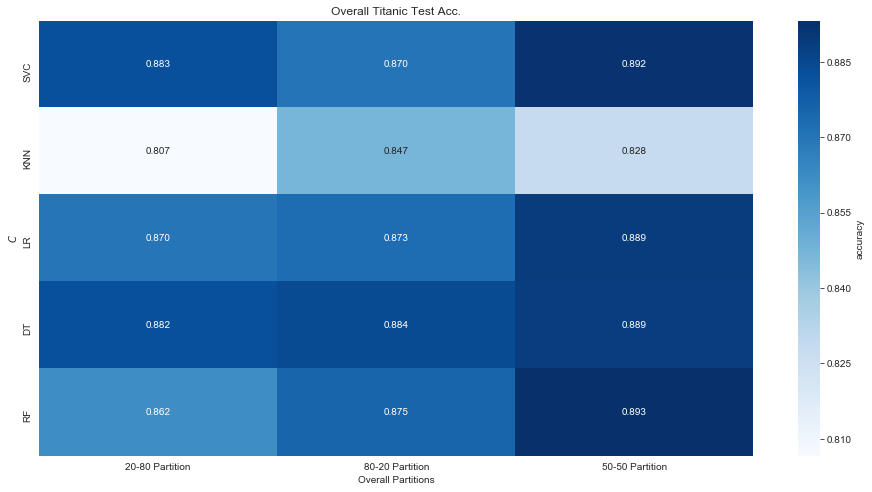

In [45]:
original_wc_results = np.array([svc_overall_test_acc, knn_overall_test_acc, 
                                lr_overall_test_acc, dt_overall_test_acc,
                                rf_overall_test_acc])
original_wc_results = original_wc_results.reshape(5, 3)
partition_names = ["20-80 Partition", "80-20 Partition", "50-50 Partition"]
y_axis_labels = ['SVC', 'KNN', 'LR', 'DT', 'RF']

heatmap_overall(original_wc_results, "Overall Titanic Test Acc.", y_axis_labels, partition_names)